In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage, misc
from scipy.linalg import toeplitz
np.set_printoptions(threshold=np.inf)

In [3]:
# Inputs
n     = 41
m     = 80
depth = 40.0

dm = depth/float(m)
dn = depth/float(n)
depths = np.linspace(0.0,depth,m) 

In [4]:
# Build G
g  = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        if(i*dn>j*dm):
            g[i,j]=dm
        elif(i*dn>=(j-1)*dm):
            g[i,j]=i*dn-(j-1)*dm

In [5]:
# Input model
mtrue = np.zeros((m))
for j in range(m):
    if(j>=(3*m)/8 and j<(5*m)/8):
        mtrue[j]=2.0
    else:
        mtrue[j]=2.0+3.0*float(j)/float(m)

# Input noisy data 
d=np.zeros((n))
np.random.seed(0)
d=np.dot(g,mtrue)+np.random.normal(0.0,0.1,n)

In [6]:
# Build Covariance matrices
Cd    = np.eye(n)
Cdi   = np.linalg.inv(Cd)
# Build Weighting matrix
Wm   = np.diff(np.eye(m),2,0)   # make 2nd derivative matrix
Wm   = np.vstack([np.zeros(m), Wm, np.zeros(m)])
Wm[0,0]   = -2 
Wm[0,1]   = 1 
Wm[-1,-1] = -2
Wm[-1,-2] = 1
# small weights for region inside s=2
Wm_2      = Wm
for i in range(m):
    if(i>(3*m)/8 and i<(5*m)/8):
        Wm_2[i,i]   = Wm_2[i,i]*0.00001
        Wm_2[i,i-1] = Wm_2[i,i-1]*0.00001
        Wm_2[i,i+1] = Wm_2[i,i+1]*0.00001

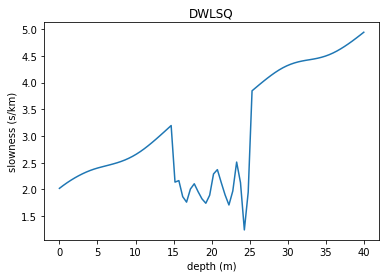

In [7]:
# Problem 2a
# find values of eps, n to preserve solution
m0    = mtrue
eps   = 8**2; 
gtg1  = np.dot(np.dot(g.T,Cdi),g)
temp1 = np.linalg.inv(gtg1+(eps*Wm))
temp2 = d-np.dot(g,m0)
temp3 = np.dot(np.dot(g.T,Cdi),temp2)
mest2 = m0+np.dot(temp1,temp3) # WDLSQ

ax=plt.subplot(111)
plt.tick_params(axis="True", which="both", bottom="True", top="False", 
               labelbottom="True", left="True", right="False", labelleft="True")
plt.plot(depths,mest2)
ax.set_xlabel("depth (m)")
ax.set_ylabel("slowness (s/km)")
plt.title('DWLSQ')
plt.show()

In [8]:
#Problem 2b
#Small weights in s=2 region (Wm_2) & test large and small eps
eps_small = .001**2; 
eps_large = 1**2; 
gtg2      = np.dot(np.dot(g.T,Cdi),g)
temp1_small  = np.linalg.inv(gtg2+(eps_small*Wm_2))
temp1_large  = np.linalg.inv(gtg2+(eps_large*Wm_2))
temp2        = d-np.dot(g,m0)
temp3        = np.dot(np.dot(g.T,Cdi),temp2)
mest_small_e = m0+np.dot(temp1_small,temp3)
mest_large_e = m0+np.dot(temp1_large,temp3)

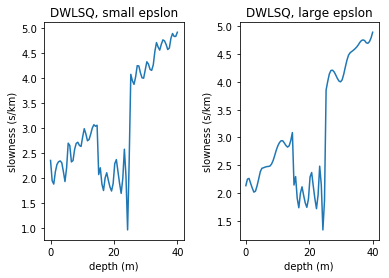

In [9]:
ax=plt.subplot(121)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tick_params(axis="True", which="both", bottom="True", top="False", 
               labelbottom="True", left="True", right="False", labelleft="True")
plt.plot(depths,mest_small_e)
ax.set_xlabel("depth (m)")
ax.set_ylabel("slowness (s/km)")
plt.title('DWLSQ, small epslon')

ax=plt.subplot(122)
plt.tick_params(axis="True", which="both", bottom="True", top="False", 
               labelbottom="True", left="True", right="False", labelleft="True")
plt.plot(depths,mest_large_e)
ax.set_xlabel("depth (m)")
ax.set_ylabel("slowness (s/km)")
plt.title('DWLSQ, large epslon')

plt.show()

In [10]:
# Problem 3 - overdetermined problem
# Inputs
n     = 160
m     = 80
depth = 40.0
dm = depth/float(m)
dn = depth/float(n)
depths = np.linspace(0.0,depth,m) 
# Build G
g  = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        if(i*dn>j*dm):
            g[i,j]=dm
        elif(i*dn>=(j-1)*dm):
            g[i,j]=i*dn-(j-1)*dm
# Input model
mtrue = np.zeros((m))
for j in range(m):
    if(j>=(3*m)/8 and j<(5*m)/8):
        mtrue[j]=2.0
    else:
        mtrue[j]=2.0+3.0*float(j)/float(m)
# Input noisy data 
d=np.zeros((n))
np.random.seed(0)
d=np.dot(g,mtrue)+np.random.normal(0.0,0.1,n)

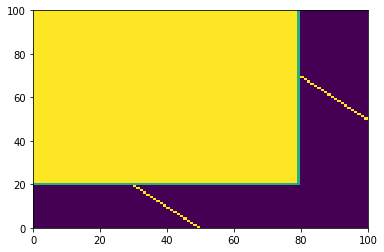

In [37]:
p = int(m/4)
F = np.zeros((p,m))
h = np.zeros(p)
maug = np.zeros(m+p)

h=2*np.ones(p)
for i in range(p):
    F[i,int(i+3*m/8)] = 1
    
temp = np.dot(g.T,g)
sys  = np.hstack((np.vstack((temp,F)), np.vstack((F.T, np.zeros((p,p))))))
daug = np.concatenate((np.dot(g.T, d), h))
maug = np.dot(np.linalg.inv(sys), daug)
mest_c2 = maug[0:m]

plt.pcolor(np.flipud(sys), vmin=0, vmax=1)

Text(0.5,1,'M_est w/ s=2 constraint')

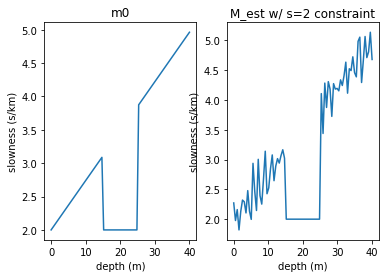

In [23]:
ax=plt.subplot(121)
plt.tick_params(axis="True", which="both", bottom="True", top="False", 
               labelbottom="True", left="True", right="False", labelleft="True")
plt.plot(depths,m0)
ax.set_xlabel("depth (m)")
ax.set_ylabel("slowness (s/km)")
plt.title('m0')

ax=plt.subplot(122)
plt.tick_params(axis="True", which="both", bottom="True", top="False", 
               labelbottom="True", left="True", right="False", labelleft="True")
plt.plot(depths,mest_c2[0:80])
ax.set_xlabel("depth (m)")
ax.set_ylabel("slowness (s/km)")
plt.title('M_est w/ s=2 constraint')

